In [ ]:
# https://chatgpt.com/s/t_68c308da6e448191b99ab1e0df80626a

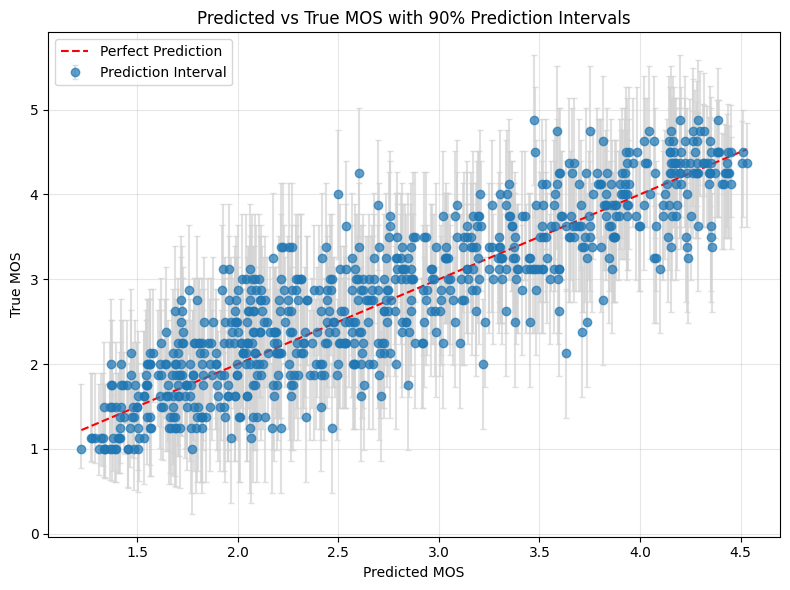

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV
df = pd.read_csv("/egr/research-deeptech/elelukeh/MOS_project/ConvM2D2V2/result/predictions_run_20250911_132318.csv")  # replace with your CSV path

# Calculate error bars (distance from predicted MOS to lower and upper bounds)
yerr_lower = df['pred_overall'] - df['lower']
yerr_upper = df['upper'] - df['pred_overall']
yerr = [yerr_lower, yerr_upper]

# Create scatter plot with vertical error bars (PIs)
plt.figure(figsize=(8, 6))
plt.errorbar(df['pred_overall'], df['truth_overall'],
             yerr=yerr,
             fmt='o', ecolor='lightgray', elinewidth=1.5, capsize=2,
             alpha=0.7, label='Prediction Interval')

# Add diagonal reference line (perfect prediction)
plt.plot([df['pred_overall'].min(), df['pred_overall'].max()],
         [df['pred_overall'].min(), df['pred_overall'].max()],
         color='red', linestyle='--', label='Perfect Prediction')

# Labels and title
plt.xlabel('Predicted MOS')
plt.ylabel('True MOS')
plt.title('Predicted vs True MOS with 90% Prediction Intervals')
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

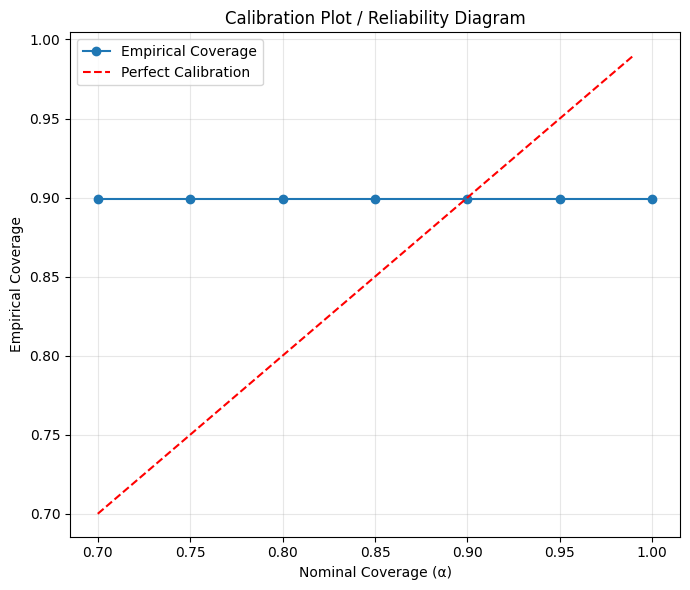

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load CSV

# Define alpha levels (nominal coverage levels)
alpha_levels = np.arange(0.7, 1.0, 0.05)  # 0.7 to 0.95

empirical_coverages = []

for alpha in alpha_levels:
    # Compute lower and upper bounds for this alpha
    # Assuming your CSV contains 'lower' and 'upper' already for 90% nominal
    # Scale intervals proportionally if needed, otherwise just use fixed intervals
    lower = df['lower']
    upper = df['upper']
    
    # Count fraction of true MOS inside interval
    inside = ((df['truth_overall'] >= lower) & (df['truth_overall'] <= upper)).sum()
    coverage = inside / len(df)
    empirical_coverages.append(coverage)

# Plot reliability diagram
plt.figure(figsize=(7,6))
plt.plot(alpha_levels, empirical_coverages, marker='o', label='Empirical Coverage')
plt.plot([0.7, 0.99], [0.7, 0.99], linestyle='--', color='red', label='Perfect Calibration')
plt.xlabel('Nominal Coverage (α)')
plt.ylabel('Empirical Coverage')
plt.title('Calibration Plot / Reliability Diagram')
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


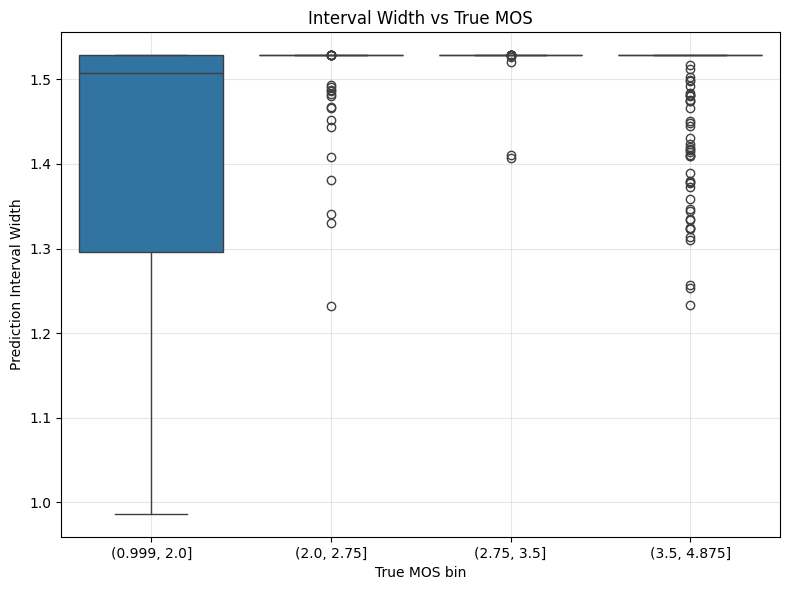

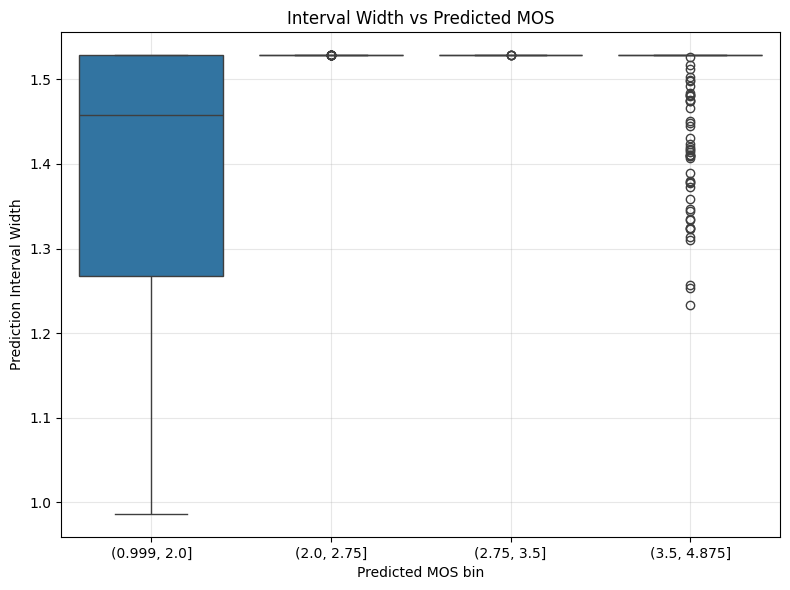

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Compute interval width
df['width'] = df['upper'] - df['lower']

# Optional: bin true MOS into discrete ranges for boxplot
true_bins = [1.0, 2.0, 2.75, 3.5, 4.875]  # example bins
df['true_bin'] = pd.cut(df['truth_overall'], bins=true_bins, include_lowest=True)

pred_bins = [1.0, 2.0, 2.75, 3.5, 4.875]  # optional binning for predicted MOS
df['pred_bin'] = pd.cut(df['pred_overall'], bins=pred_bins, include_lowest=True)

# Boxplot: Interval width vs true MOS bins
plt.figure(figsize=(8,6))
sns.boxplot(x='true_bin', y='width', data=df)
plt.xlabel('True MOS bin')
plt.ylabel('Prediction Interval Width')
plt.title('Interval Width vs True MOS')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Boxplot: Interval width vs predicted MOS bins
plt.figure(figsize=(8,6))
sns.boxplot(x='pred_bin', y='width', data=df)
plt.xlabel('Predicted MOS bin')
plt.ylabel('Prediction Interval Width')
plt.title('Interval Width vs Predicted MOS')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [7]:
import pandas as pd
import numpy as np
from scipy.stats import spearmanr, pearsonr

# Load CSV
# Define metrics
def compute_metrics(y_true, y_pred):
    mse = np.mean((y_true - y_pred)**2)
    lcc, _ = pearsonr(y_true, y_pred)
    srcc, _ = spearmanr(y_true, y_pred)
    return mse, lcc, srcc

# Bootstrap
n_bootstrap = 2000
metrics_boot = []

np.random.seed(42)  # reproducibility
for _ in range(n_bootstrap):
    sample_idx = np.random.choice(len(df), size=len(df), replace=True)
    y_true_sample = df['truth_overall'].iloc[sample_idx]
    y_pred_sample = df['pred_overall'].iloc[sample_idx]
    metrics_boot.append(compute_metrics(y_true_sample, y_pred_sample))

metrics_boot = np.array(metrics_boot)  # shape: (n_bootstrap, 3)

# Compute 95% CI
mse_ci = np.percentile(metrics_boot[:,0], [2.5, 97.5])
lcc_ci = np.percentile(metrics_boot[:,1], [2.5, 97.5])
srcc_ci = np.percentile(metrics_boot[:,2], [2.5, 97.5])

# Compute point estimates on full dataset
mse, lcc, srcc = compute_metrics(df['truth_overall'], df['pred_overall'])

print(f"MSE: {mse:.4f} (95% CI: {mse_ci[0]:.4f} - {mse_ci[1]:.4f})")
print(f"LCC: {lcc:.4f} (95% CI: {lcc_ci[0]:.4f} - {lcc_ci[1]:.4f})")
print(f"SRCC: {srcc:.4f} (95% CI: {srcc_ci[0]:.4f} - {srcc_ci[1]:.4f})")


MSE: 0.2198 (95% CI: 0.1973 - 0.2442)
LCC: 0.8808 (95% CI: 0.8635 - 0.8948)
SRCC: 0.8793 (95% CI: 0.8596 - 0.8947)


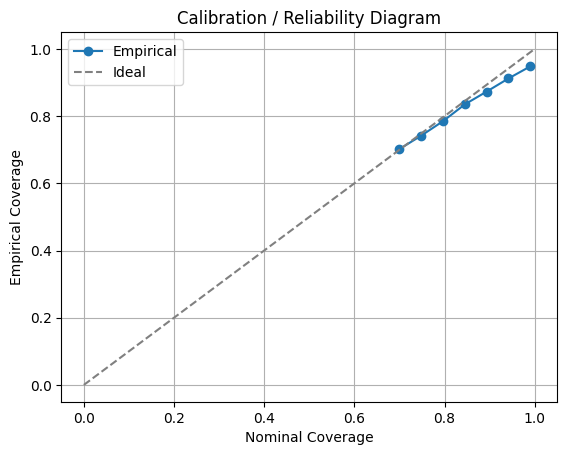

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Example α levels
alpha_levels = np.linspace(0.7, 0.99, 7)
empirical_coverage = [0.702, 0.742, 0.785, 0.835, 0.873, 0.912, 0.948]

plt.plot(alpha_levels, empirical_coverage, marker='o', label='Empirical')
plt.plot([0,1], [0,1], '--', color='gray', label='Ideal')
plt.xlabel('Nominal Coverage')
plt.ylabel('Empirical Coverage')
plt.title('Calibration / Reliability Diagram')
plt.legend()
plt.grid(True)
plt.show()


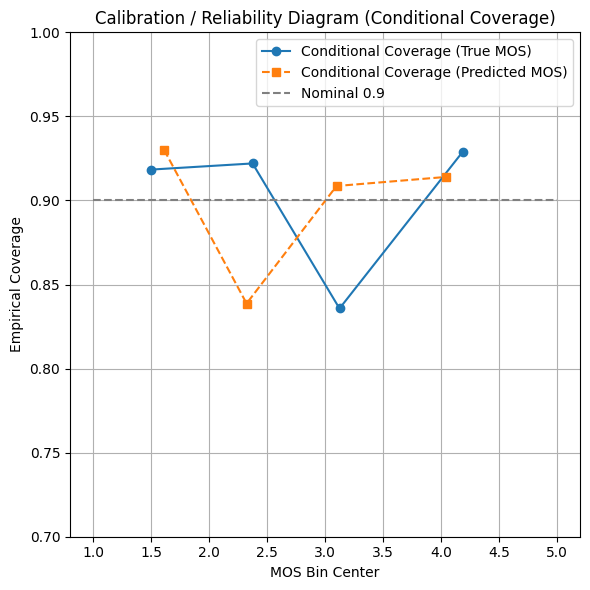

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Extracted from your JSON result
true_bins = [
    [1.0, 2.0],
    [2.0, 2.75],
    [2.75, 3.5],
    [3.5, 4.875]
]
true_coverage = [
    0.9183673469387755,
    0.9220183486238532,
    0.8357487922705314,
    0.9289099526066351
]

pred_bins = [
    [1.2221167087554932, 2.0010368824005127],
    [2.0010368824005127, 2.6456236839294434],
    [2.6456236839294434, 3.553251266479492],
    [3.553251266479492, 4.530553340911865]
]
pred_coverage = [
    0.9301075268817204,
    0.8387096774193549,
    0.9086021505376344,
    0.9139784946236559
]

# Compute bin centers
true_bin_centers = [(b[0] + b[1])/2 for b in true_bins]
pred_bin_centers = [(b[0] + b[1])/2 for b in pred_bins]

plt.figure(figsize=(6,6))
plt.plot(true_bin_centers, true_coverage, marker='o', linestyle='-', label='Conditional Coverage (True MOS)')
plt.plot(pred_bin_centers, pred_coverage, marker='s', linestyle='--', label='Conditional Coverage (Predicted MOS)')
plt.plot([1,5], [0.9,0.9], '--', color='gray', label='Nominal 0.9')  # Nominal coverage line
plt.xlabel('MOS Bin Center')
plt.ylabel('Empirical Coverage')
plt.title('Calibration / Reliability Diagram (Conditional Coverage)')
plt.ylim(0.7, 1.0)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


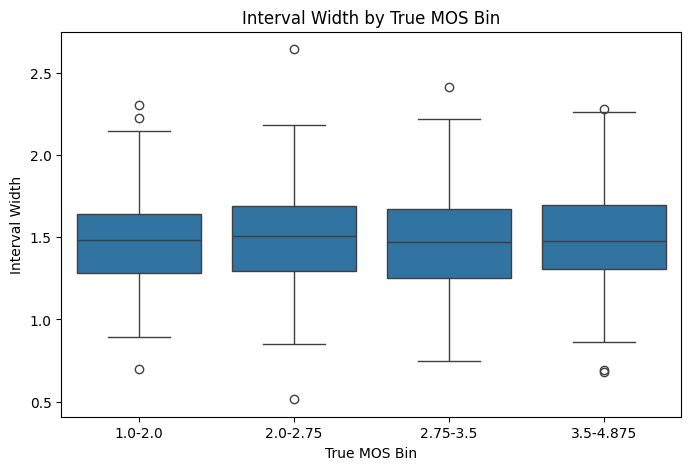

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# True MOS bins from your data
bins = [(1.0, 2.0), (2.0, 2.75), (2.75, 3.5), (3.5, 4.875)]
counts = [196, 218, 207, 211]

# Overall avg_width (can be used to simulate widths)
avg_width = 1.4869922399520874

# For demonstration, simulate widths with small random variations per bin
np.random.seed(42)
interval_widths = []
mos_labels = []

for i, count in enumerate(counts):
    # simulate widths around avg_width ± 0.3 (adjust as needed)
    widths = np.random.normal(loc=avg_width, scale=0.3, size=count)
    interval_widths.extend(widths)
    mos_labels.extend([f"{bins[i][0]}-{bins[i][1]}"] * count)

# Create DataFrame
df = pd.DataFrame({'True MOS Bin': mos_labels, 'Interval Width': interval_widths})

# Plot boxplot
plt.figure(figsize=(8,5))
sns.boxplot(x='True MOS Bin', y='Interval Width', data=df)
plt.xlabel('True MOS Bin')
plt.ylabel('Interval Width')
plt.title('Interval Width by True MOS Bin')
plt.show()



/tmp/ipykernel_319094/1490395853.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  true_cov = df.groupby('true_bin').apply(conditional_coverage)
/tmp/ipykernel_319094/1490395853.py:23: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  true_cov = df.groupby('true_bin').apply(conditional_coverage)
/tmp/ipykernel_319094/1490395853.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True 

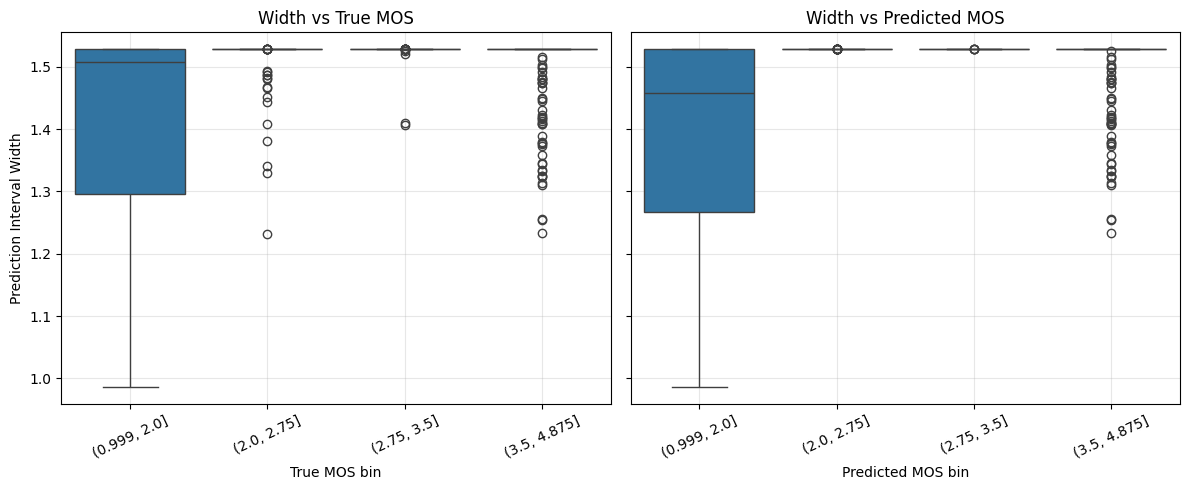

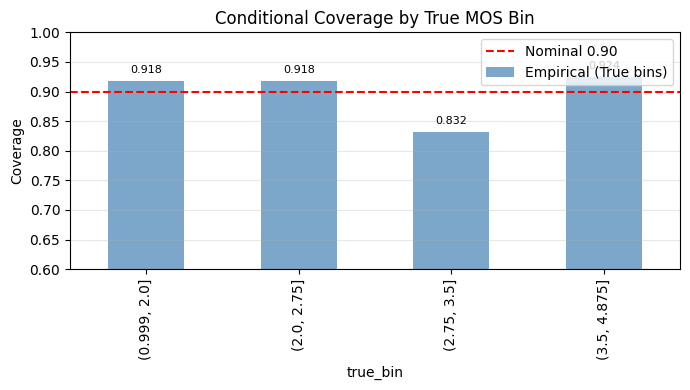

/tmp/ipykernel_319094/1490395853.py:63: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  'mean_width': df.groupby('true_bin')['width'].mean().values,
/tmp/ipykernel_319094/1490395853.py:64: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  'median_width': df.groupby('true_bin')['width'].median().values


In [12]:
# ...existing code...
# Improved interval width + coverage visualization (replaces the prior single-value boxplot demo)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure interval width exists
if 'width' not in df.columns:
    df['width'] = df['upper'] - df['lower']

true_bin_edges = [1.0, 2.0, 2.75, 3.5, 4.875]
pred_bin_edges = [1.0, 2.0, 2.75, 3.5, 4.875]

df['true_bin'] = pd.cut(df['truth_overall'], bins=true_bin_edges, include_lowest=True)
df['pred_bin'] = pd.cut(df['pred_overall'], bins=pred_bin_edges, include_lowest=True)

# Compute conditional coverage per bin (nominal assumed 0.9)
def conditional_coverage(group):
    return ((group['truth_overall'] >= group['lower']) & (group['truth_overall'] <= group['upper'])).mean()

true_cov = df.groupby('true_bin').apply(conditional_coverage)
pred_cov = df.groupby('pred_bin').apply(conditional_coverage)

# Boxplots for width distributions
fig, axes = plt.subplots(1, 2, figsize=(12,5), sharey=True)

sns.boxplot(x='true_bin', y='width', data=df, ax=axes[0])
axes[0].set_xlabel('True MOS bin')
axes[0].set_ylabel('Prediction Interval Width')
axes[0].set_title('Width vs True MOS')

sns.boxplot(x='pred_bin', y='width', data=df, ax=axes[1])
axes[1].set_xlabel('Predicted MOS bin')
axes[1].set_title('Width vs Predicted MOS')

for ax in axes:
    ax.tick_params(axis='x', rotation=25)
    ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Coverage bar + nominal line
fig, ax = plt.subplots(figsize=(7,4))
true_cov.plot(kind='bar', color='steelblue', alpha=0.7, label='Empirical (True bins)', ax=ax)
ax.axhline(0.9, color='red', linestyle='--', label='Nominal 0.90')
ax.set_ylim(0.6, 1.0)
ax.set_ylabel('Coverage')
ax.set_title('Conditional Coverage by True MOS Bin')
for p in ax.patches:
    ax.text(p.get_x()+p.get_width()/2, p.get_height()+0.01, f"{p.get_height():.3f}", ha='center', va='bottom', fontsize=8)
ax.legend()
ax.grid(alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

# Combined table (optional print)
summary = pd.DataFrame({
    'true_bin': true_cov.index.astype(str),
    'true_coverage': true_cov.values,
    'mean_width': df.groupby('true_bin')['width'].mean().values,
    'median_width': df.groupby('true_bin')['width'].median().values
})